# 'cute quaint simpl honest'

# Ziel - Die Erstellung eines Machine Learning Models für die Klassifizierung verschiedenen Reviews

## Import der Bibliotheken

#### NLTK: Natural Language Processing Toolkit ist eine Python Bibliothek die wir nutzen um NLP Aufgaben wie Stemming, Lemmatisierung, Stopwords entfernen umzusetzten.

#### Porter Stemmer : Ist eine art von Stemmer. Stemming ist eine Technique die ein Wort in einem Wurzel Wort umwandelt. 

bsp für Englisch :
- learning - learn
- earning - earn


In [1]:
import numpy as np ## scientific computation
import pandas as pd ## loading dataset file
import matplotlib.pyplot as plt ## Visulization
import nltk  ## Preprocessing Reviews
nltk.download('stopwords') ##Downloading stopwords
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of words
import re  ## To use Regular expression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset aus Datei lesen

#### Dataset wird aus einer CSV (comma separated values) gelesen. Als Separator für die Spalten im Text wird Tab verwendet

Die Datei enthält zwei Spalten: Review und Like. 

- Review: Enthält Reviews von verschiedenen Kunden
- Like: Ist eine numerische Spalte 0 bedeutet negativ und 1 bedeutet positiv

#### Dateiquelle
- https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences


In [2]:
dataset = pd.read_csv("yelp_labelled.txt",delimiter = "\t",quoting=3)

## EDA (exploratory data analysis) für unser Dataset

wir wollen überprüfen ob: 
- die Anzahl von Spalten richtig ist(2)
- die Namen der Spalten richtig sind (Review und Like)
- die Anzahl der Zeilen richtig ist (1000)
- die Daten enthalten keine NULL Werte
- der datentyp für die Like Spalte numerisch ist

In [3]:
print(dataset.shape)  ### Return the shape of data 
print(dataset.ndim)   ### Return the n dimensions of data
print(dataset.size)   ### Return the size of data 
print(dataset.isna().sum())  ### Returns the sum fo all na values
print(dataset.info())  ### Give concise summary of a DataFrame
print(dataset.head())  ## top 5 rows of the dataframe
print(dataset.tail()) ## bottom 5 rows of the dataframe

(1000, 2)
2
2000
Review    0
Like      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Like    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
                                              Review  Like
0                           Wow... Loved this place.     1
1                                 Crust is not good.     0
2          Not tasty and the texture was just nasty.     0
3  Stopped by during the late May bank holiday of...     1
4  The selection on the menu was great and so wer...     1
                                                Review  Like
995  I think food should have flavor and texture an...     0
996                           Appetite instantly gone.     0
997  Overall I was not impressed and would not go b...     0
998  The whole experience was underwhelming

## Wir zeigen die Spalte Like in einem Graph 

#### Wir wollen sicherstellen das dieAnzahl von negativen (Like = 0) und positiven (Like = 1) Reviews gleich ist.

D:\backup\_DSqleen\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Like', ylabel='count'>

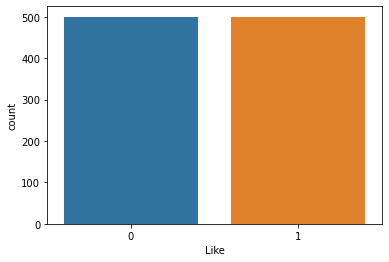

In [4]:
import seaborn as sns
sns.countplot('Like',data=dataset)

## Preprocessing der Daten

### Damit wollen wir die Daten für den Maschine Learning Algorithmus vorbereiten

#### für jedes Review:

- Entfernung aller Zeichen die keine Buchstaben sind
- Konvertierung aller Buchstaben in Kleinbuchstaben
- Wir entfernen alle Stopwords (Stoppwörter). Diese sind Worte die sehr häufig auftreten und keine Relevanz für die Erfassung des Dokumentinhalts besitzen. Allgemein übliche Stoppwörter sind bestimmte Artikel, unbestimmte Artikel, Konjunktionen und häufig gebrauchte Präpositionen. Eine Ausnahme: hier entfernen wir nicht das Wort "not" weil es die Bedeutung eines Reviews ändern kann.

In [5]:
corpus = []
for i in range(0,1000):   #we have 1000 reviews
     review = re.sub('[^a-zA-Z]'," ",dataset["Review"][i])
     review = review.lower()
     review = review.split()
     pe = PorterStemmer()
     all_stopword = stopwords.words('english')
     all_stopword.remove('not')
     review = [pe.stem(word) for word in review if not word in set(all_stopword)]
     review = " ".join(review)
     corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Erstellen eines Bag of Words

Die Eingangsdaten,sind eine Folge von Symbolen, die nicht direkt an die Algorithmen selbst weitergeleitet werden können, da die meisten Algorithmen numerische Merkmals-vektoren mit einer festen Größe erwarten, anstelle  der Rohtextdokumente mit variabler Länge. 

Um dies zu beheben, werden numerische Merkmale aus Textinhalten extrahiert, nämlich:
- Tokenising von Zeichenfolgen und Angabe einer ganzzahligen ID für jedes mögliche Token,  
- Counting der Vorkommen von Token in jedem Dokument.
- Normalizing und Gewichtung mit abnehmender Wichtigkeit Token, die in der Mehrzahl  der Daten vorkommen. 

Ein Korpus von Dokumenten kann somit durch eine Matrix dargestellt werden, wobei  eine Zeile pro Dokument und eine Spalte pro Token (z.B. Wort) im Korpus vorkommt. 

Wir nennen Vektorisierung(CountVectorizer) den allgemeinen Prozess, bei dem eine Sammlung von Text-dokumenten in numerische Merkmalsvektoren umgewandelt wird. Diese spezifische Strategie (Tokenisierung, Zählung und Normalisierung) wird als Bag of Words oder "Bag of n-Grams" -Darstellung  bezeichnet. Dokumente werden durch  Wortvorkommen beschrieben, wobei die relativen Positionsinformationen der Wörter im Dokumentvoll-ständig ignoriert werden. 


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset["Like"]

## Speicherung von Bag of Words in einer Datei

In [7]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))

## Split von Daten in Training- und Testdaten

80 % von Daten werdn als Trainingdaten verwendet und
20 % von Daten werden als Testdaten verwendet

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Entscheidungsbaum als Trainingsmodell

Hier wird erstmal einen Entscheidungsbaummodell erstellt und mit Daten trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.

Die Genauigkeit liegt zwischen 0,72 und 0,77

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
print(DTC.score(X_test,y_test))

0.725


# Random Forest 

Hier wird einen Random Forest Modell erstellt und mit Daten trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.


In [10]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print(RFC.score(X_test,y_test))

0.77


# Random Forest und Entscheidungsbaum liefern für unsere Daten ähnliche Ergebnisse

## Prediction - mit Entscheidungsbaum als Trainingsmodell


In [11]:
y_pred=DTC.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Modell bewerten - mittels Confusion Matrix und Accuracy Score

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[74 23]
 [32 71]] 72.5


# Speichern des Modells - das trainierte Modell wird als Datei gespeichert

In [13]:
import pickle
# Save trained model to file
pickle.dump(DTC, open("review.pkl", "wb"))

## Erneutes Laden des Modells in einer Variable

In [14]:
loaded_model = pickle.load(open("review.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.725

# Voraussage Sentiment für eine neue Review

In [15]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in  set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test.shape)
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
   print("Positive")
else :
   print("Negative")

Enter new review...I do not love cupcakes
(1, 1500)
Negative
